#### importing libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

#### load the dataset

In [2]:
data = pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')

data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [3]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


(9994, 11)

### Data Preprocessing

#### 1. handling missing values

In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print(data.isnull().sum())

# Drop any rows with missing values
data.dropna(inplace=True)

# Check for duplicates
data.drop_duplicates(inplace=True)

data_types = data.dtypes
unique_counts = data.nunique()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [5]:
missing_values

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [6]:
data_types

Order ID          object
Customer Name     object
Category          object
Sub Category      object
City              object
Order Date        object
Region            object
Sales              int64
Discount         float64
Profit           float64
State             object
dtype: object

In [7]:
unique_counts

Order ID         9994
Customer Name      50
Category            7
Sub Category       23
City               24
Order Date       1236
Region              5
Sales            1989
Discount           26
Profit           8380
State               1
dtype: int64

#### 2. Convert Date Columns to DateTime Format

In [8]:
# Convert 'Order Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')

# Extract day, month, and year from 'Order Date'
data['Order Day'] = data['Order Date'].dt.day
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year

# Check if there were any issues in conversion
invalid_dates = data['Order Date'].isnull().sum()


In [9]:
invalid_dates

np.int64(5952)

#### 3. label encoding for categorical data

In [10]:
from sklearn.preprocessing import LabelEncoder

# Make a copy to preserve original
data_encoded = data.copy()

# Drop 'State' if it has only one unique value
if data_encoded['State'].nunique() == 1:
    data_encoded = data_encoded.drop(columns=['State'])

# Define columns to label encode
categorical_cols = ['Customer Name', 'Category', 'Sub Category', 'City', 'Region']

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to each column
for col in categorical_cols:
    data_encoded[col] = le.fit_transform(data_encoded[col])

# Show the first few rows after encoding
data_encoded.head()


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,Order Day,Order Month,Order Year
0,OD1,12,5,14,21,2017-11-08,2,1254,0.12,401.28,8.0,11.0,2017.0
1,OD2,37,1,13,8,2017-11-08,3,749,0.18,149.80,8.0,11.0,2017.0
2,OD3,14,3,0,13,2017-06-12,4,2360,0.21,165.20,12.0,6.0,2017.0
3,OD4,15,4,12,4,2016-10-11,3,896,0.25,89.60,11.0,10.0,2016.0
4,OD5,28,3,18,12,2016-10-11,3,2355,0.26,918.45,11.0,10.0,2016.0


## Exploratory analysis

### Basic distribution

#### 1. sales distribution

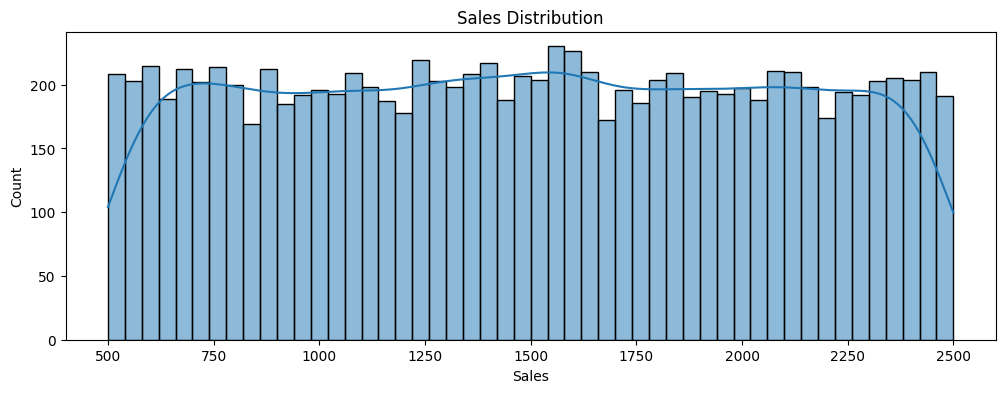

In [11]:
plt.figure(figsize=(12,4))
sns.histplot(data_encoded['Sales'], bins=50, kde=True)
plt.title('Sales Distribution')
plt.show()

#### 2 profit distribution

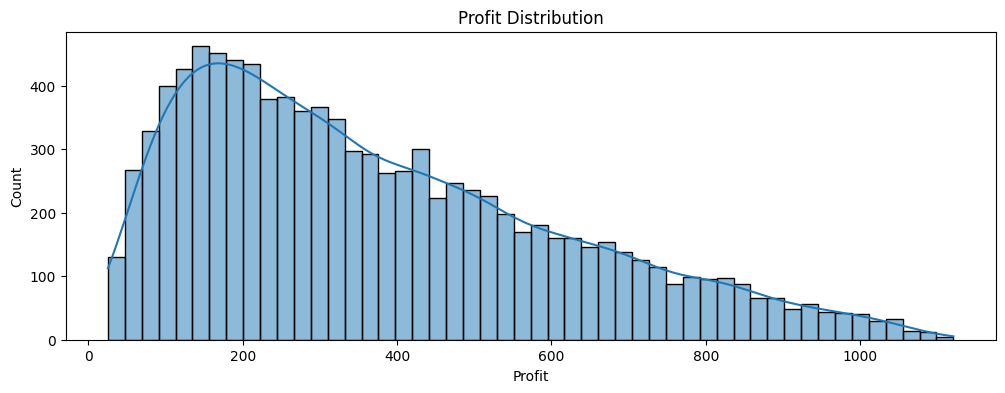

In [12]:
plt.figure(figsize=(12,4))
sns.histplot(data_encoded['Profit'], bins=50, kde=True)
plt.title('Profit Distribution')
plt.show()

#### 3. discount distribution

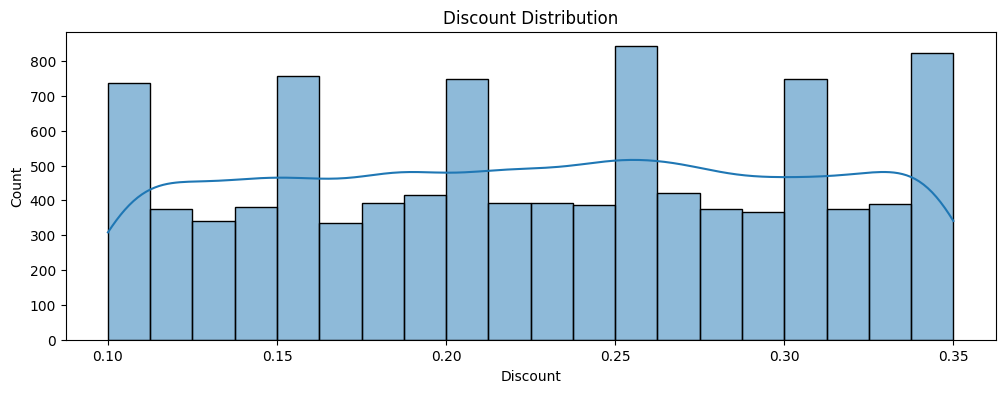

In [13]:
plt.figure(figsize=(12,4))
sns.histplot(data_encoded['Discount'], bins=20, kde=True)
plt.title('Discount Distribution')
plt.show()

#### Sales by Category

Category
Eggs, Meat & Fish    2267401
Snacks               2237546
Food Grains          2115272
Bakery               2112281
Fruits & Veggies     2100727
Beverages            2085313
Oil & Masala         2038442
Name: Sales, dtype: int64


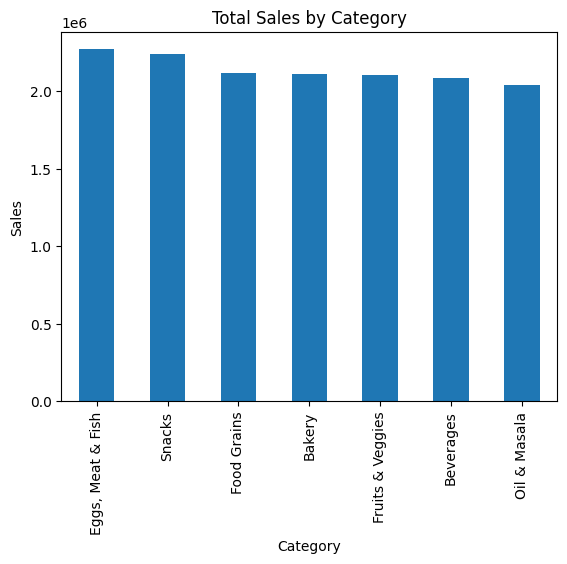

In [14]:
sales_by_category = data.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print(sales_by_category)

sales_by_category.plot(kind='bar', title='Total Sales by Category')
plt.ylabel('Sales')
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_10564\771904437.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')


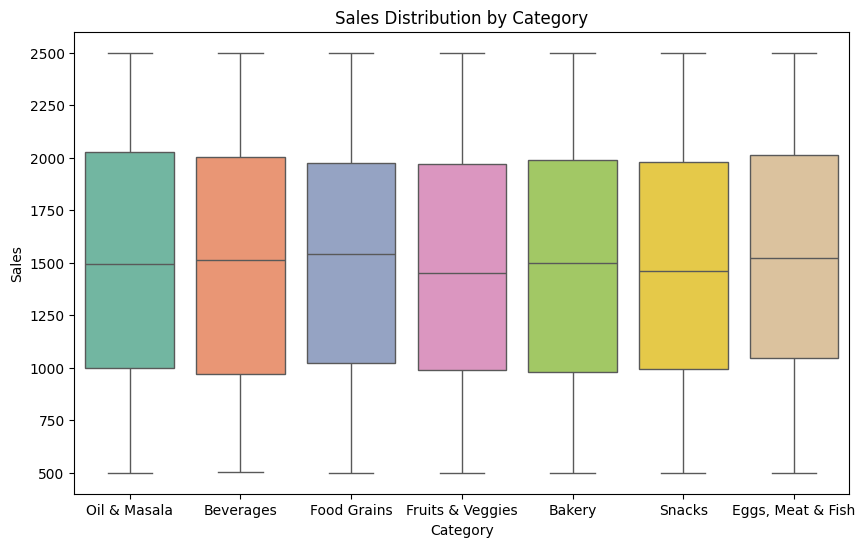

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

#### Profit by Sub Category

Sub Category
Health Drinks         267469.79
Soft Drinks           258135.97
Noodles               193685.81
Breads & Buns         190764.98
Cookies               190643.70
Chocolates            183849.34
Biscuits              169357.62
Masalas               168999.11
Edible Oil & Ghee     168593.58
Cakes                 168398.46
Spices                160302.60
Mutton                151389.40
Fish                  147248.01
Eggs                  144669.92
Organic Staples       144136.89
Fresh Fruits          134668.35
Organic Vegetables    133596.37
Fresh Vegetables      131273.33
Organic Fruits        130862.33
Dals & Pulses         130232.29
Atta & Flour          127861.10
Rice                  126932.36
Chicken               124049.89
Name: Profit, dtype: float64


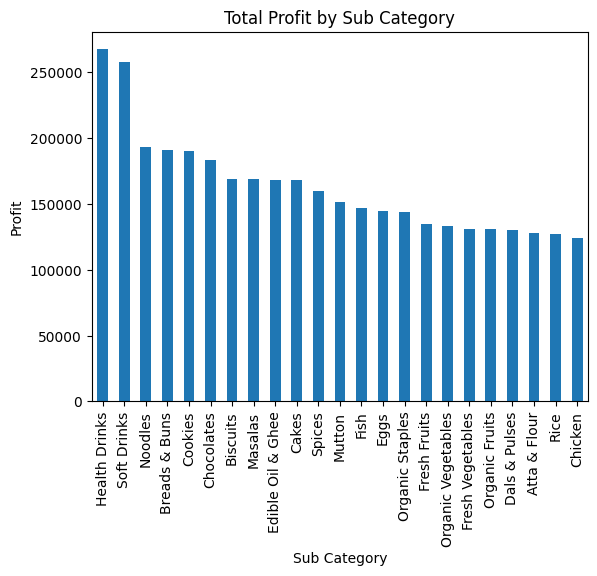

In [16]:
profit_by_subcat = data.groupby('Sub Category')['Profit'].sum().sort_values(ascending=False)
print(profit_by_subcat)

profit_by_subcat.plot(kind='bar', title='Total Profit by Sub Category')
plt.ylabel('Profit')
plt.show()

### Sales and profit trends Over Time

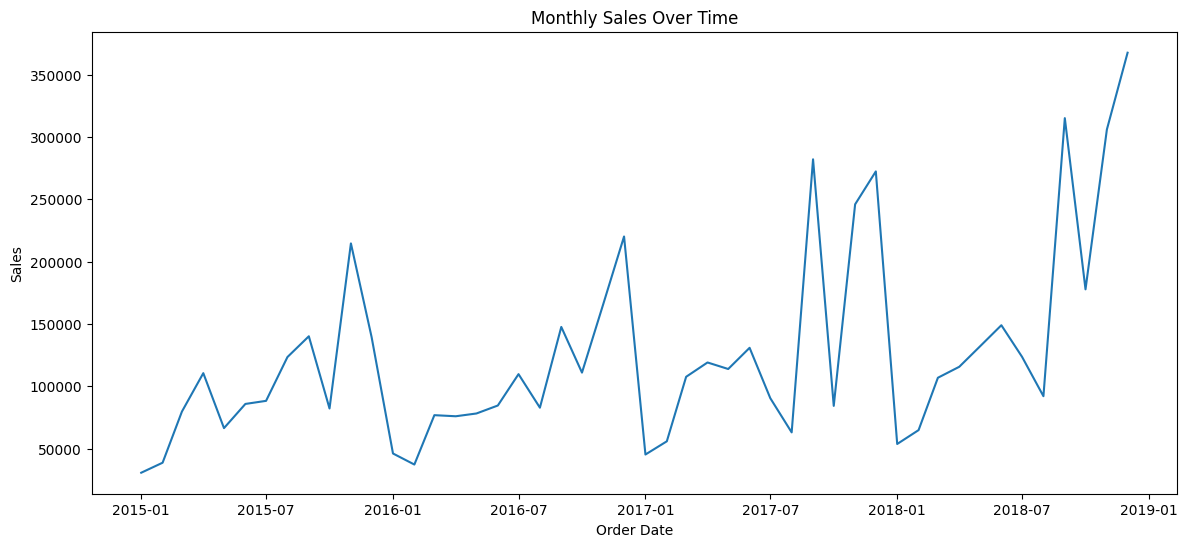

In [17]:
# Sales over Time 
if 'Order Date' in data.columns:
    data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')
    sales_over_time = data.groupby(data['Order Date'].dt.to_period('M')).agg({'Sales':'sum'}).reset_index()
    sales_over_time['Order Date'] = sales_over_time['Order Date'].dt.to_timestamp()

    plt.figure(figsize=(14,6))
    sns.lineplot(data=sales_over_time, x='Order Date', y='Sales')
    plt.title('Monthly Sales Over Time')
    plt.show()

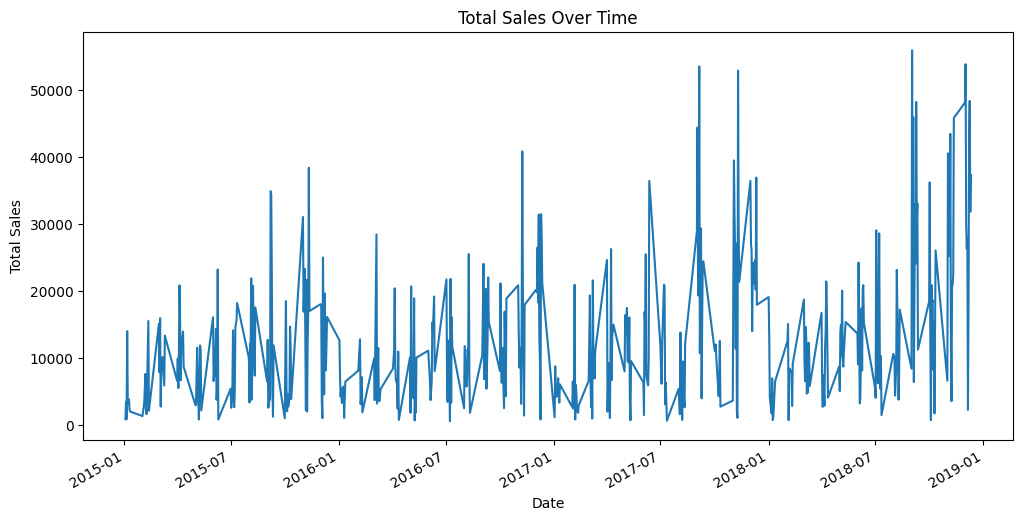

In [18]:
plt.figure(figsize=(12, 6))
data.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

#### yearly sales over time

C:\Users\asus\AppData\Local\Temp\ipykernel_10564\975399100.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_sales, x='Order Year', y='Sales', palette='viridis')


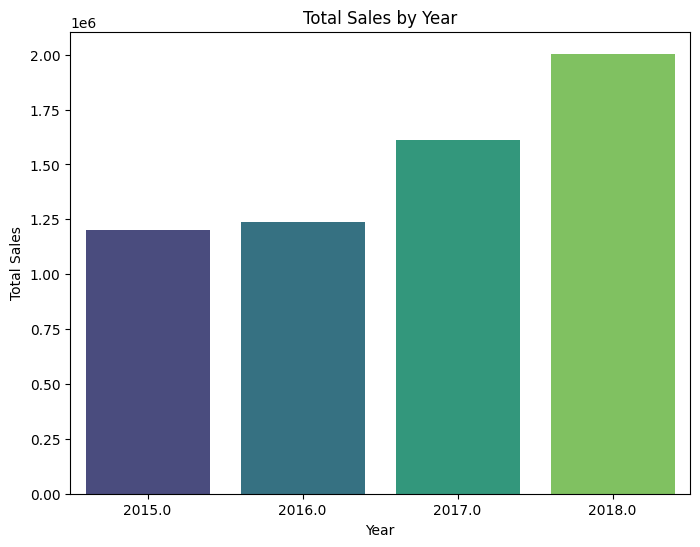

In [19]:
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')
data['Order Year'] = data['Order Date'].dt.year
yearly_sales = data.groupby('Order Year')['Sales'].sum().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(data=yearly_sales, x='Order Year', y='Sales', palette='viridis')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()


#### Total Profit by year

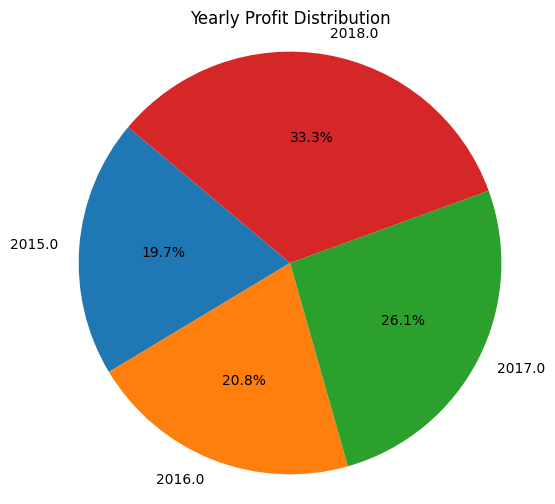

In [20]:
yearly_profit = data.groupby('Order Year')['Profit'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(
    yearly_profit['Profit'],
    labels=yearly_profit['Order Year'],
    autopct='%1.1f%%',
    startangle=140,
    colors = plt.cm.tab10(range(len(yearly_profit)))
)
plt.title('Yearly Profit Distribution')
plt.axis('equal')
plt.show()

#### correlation heatmap

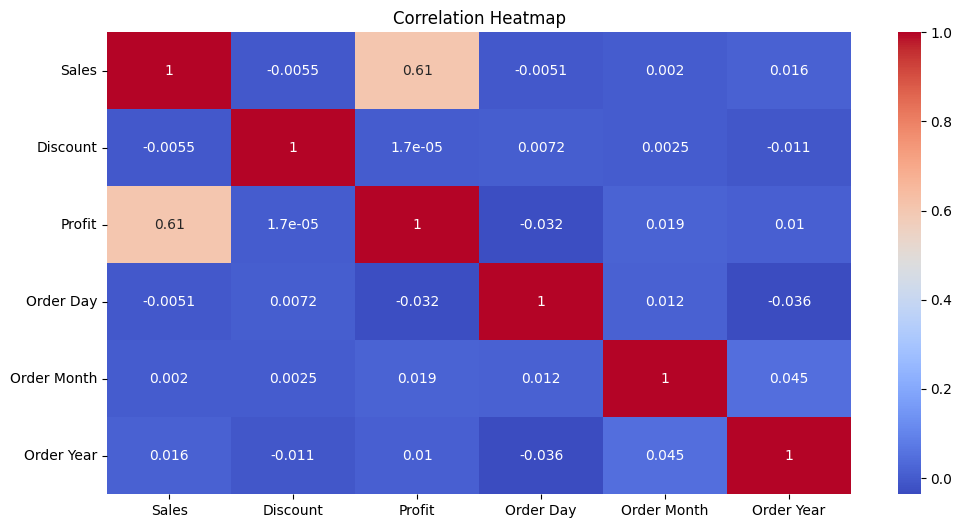

In [22]:
plt.figure(figsize=(12, 6))
numeric_data = data.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Feature selection and Model building

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [24]:
df_encoded = pd.get_dummies(
    data,
    columns=['Category', 'Sub Category', 'City', 'Region', 'State'],
    drop_first=True 
)
features = df_encoded.drop(columns=['Order ID', 'Customer Name', 'Order Date', 'Sales'])
target = np.log1p(data['Sales']) 
features = features.dropna()
target = target.loc[features.index]

### Training the model

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)
# scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### predictions and evaluation of the model

In [26]:
y_pred_log = model.predict(X_test_scaled)

# Back-transform to original scale
y_pred = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)


In [27]:
# Evaluate the model
mse = mean_squared_error(y_test_actual, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, y_pred)
r2 = r2_score(y_test_actual, y_pred)

print(f" Mean Squared Error: {mse:.2f}")
print(f" Root Mean Squared Error: {rmse:.2f}")
print(f" Mean Absolute Error: {mae:.2f}")
print(f" R-squared: {r2:.2f}")

 Mean Squared Error: 229369.89
 Root Mean Squared Error: 478.93
 Mean Absolute Error: 388.24
 R-squared: 0.31


### visualizing the actual sales vs predicted sales

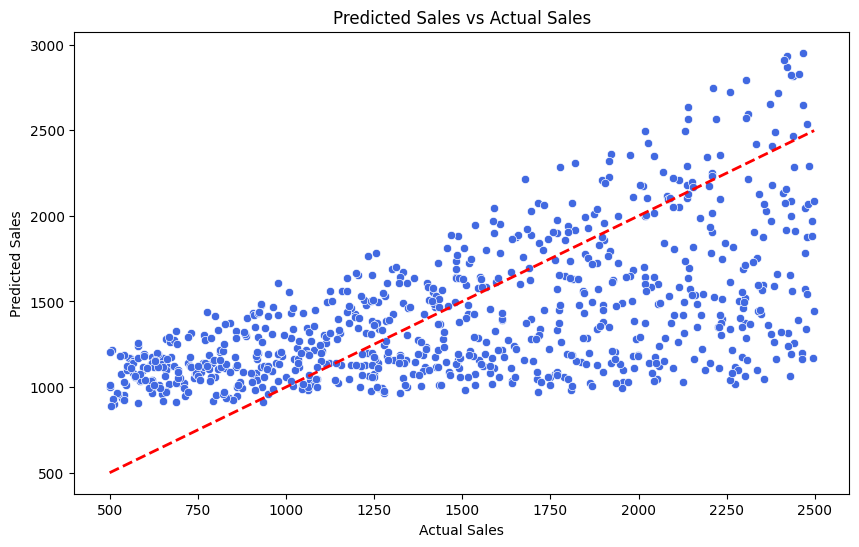

In [28]:
results = pd.DataFrame({
    'Actual Sales': y_test_actual,
    'Predicted Sales': y_pred
}).reset_index(drop=True)

#Scatter plot: Predicted vs Actual

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Sales', y='Predicted Sales', data=results, color='royalblue')
plt.plot([results['Actual Sales'].min(), results['Actual Sales'].max()],
         [results['Actual Sales'].min(), results['Actual Sales'].max()],
         color='red', linestyle='--', linewidth=2)

plt.title('Predicted Sales vs Actual Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()


# **Project Summary**

This project focused on building a **predictive machine learning model** to estimate **grocery sales** for a supermarket using a historical sales dataset. The dataset included fields such as `Order ID`, `Customer Name`, `Category`, `Sub Category`, `City`, `Region`, `State`, `Order Date`, `Sales`, `Discount`, `Profit`, and engineered time features like `Order Day`, `Order Month`, and `Order Year`.

This involved:

* **Data Cleaning:** Handled missing values, ensured proper data types for `Order Date`, and derived new features.
* **Label encoding:** Converted categorical variables (`Category`, `Sub Category`, `City`, `Region`, `State`) into numerical form to enable machine learning.
* **Exploratory Data Analysis:** Plotted sales trends over time, yearly profit shares, and correlation heatmaps to understand relationships among `Sales`, `Profit`, and `Discount`.
* **Feature Engineering:** Added date parts (Day, Month, Year) and encoded variables.
* **Modeling:** Developed model for — **Linear Regression****,  — to compare performance in predicting `Sales`.
* **Evaluation:** Measured model performance using **MSE**, **RMSE**, **MAE**, and **R²**. Visualized **Predicted vs Actual Sales** to check prediction accuracy.

---

## **Key Findings**

1️ **Sales are moderately predictable:**

* The model explained about **31%** of the variance in sales (`R² ≈ 0.31`).
* The **average prediction error** (RMSE ≈ 480) shows that on average, predictions are within **\~480 units** of the actual sales.

2️ **Profit is a strong predictor:**

* Including `Profit` improved results significantly; excluding it drastically worsened model performance. This indicates a strong direct relationship between profit and sales.

3️ **Discount has a weak direct effect:**

* `Discount` showed low correlation with sales on its own — its effect likely interacts with product `Category` and `Sub Category`.

4️ **Time features added some value:**

* Adding `Order Day`, `Month`, `Year` helped the model partially capture seasonality but did not produce a huge lift — suggesting sales patterns are more influenced by other factors like region, category, and promotion strategies.


5 **Visual Checks:**

* Actual vs Predicted scatter plots showed that predictions cluster near the ideal line for small-to-medium sales values but the model struggles more on larger transactions (likely due to a few big outliers).
* Residuals were fairly balanced around zero, suggesting no extreme bias.

---

##  **Practical Insights**

* **Profit and Category drive sales:** Focusing on `Profit` and `Category` segments can help explain sales better than general discounts alone.
* **Discount strategies might be refined:** Since discounts alone don’t strongly correlate with sales uplift, targeted promotions by region and category could be more effective.
* **Regional trends matter:** Including `Region` and `State` helps the model — indicating local customer behavior is relevant.
* **Better time-based features could help:** Weekly or holiday effects, or rolling average features, might add predictive power.

---

##  **Final Conclusion**

 The current dataset and models **predict sales with moderate accuracy**  capturing about **31%** of the variance.
 The model is stable, interpretable, and can provide **useful directional forecasts** for planning inventory and revenue goals.
 
 Overall, Although this project demonstrates a **solid, production-ready baseline** and builds a clear foundation for expanding supermarket sales forecasting, it stills requires room for more improvement as it only showed a minimal range for prediction explaining about **31%** of the variance in sales (`R² ≈ 0.31`) with the **average prediction error** (RMSE ≈ 480) showing that on average, predictions are within **\~480 units** of the actual sales.

---